In [1]:
# IMPORTS FOR ALL THE PROJECT
import numpy as np
import os
import requests
from numpy.random import default_rng
import matplotlib
import matplotlib.pyplot as plt
import tarfile
from six.moves import urllib
import pandas as pd



In [2]:
# PATH TO THE FILES

urls= ['https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/general_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/manager_survey_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/employee_survey_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/in_time.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/out_time.csv']

paths = ['./datasets/general_data.csv',
         './datasets/manager_survey_data.csv',
         './datasets/employee_survey_data.csv',
         './datasets/in_time.csv',
         './datasets/out_time.csv']

In [3]:

def fetch_datas(url, path):
    localfile, header = urllib.request.urlretrieve(url, path)
    print(localfile)
    return localfile

def extractZip(path):
    with tarfile.open(path) as tf:
        tf.extractall('./datasets')


In [4]:
def import_all_files():
    print('==='*4, "BEGIN", '==='*4)


    if not os.path.exists('./datasets/'):
        print('==='*4, "CREATING \"./datasets/\" DIRECTORY", '==='*4)
        os.mkdir('./datasets')

    for i, url in enumerate(urls):
        fetch_datas(urls[i], paths[i])

    print('==='*4, "FINISHED", '==='*4)

In [5]:
def load_datas(path):
    datas = pd.read_csv(path)
    return datas

In [6]:
# FUNCTION TO DOWNLOAD THE FILES FROM ONLINE REPO TO LOCAL FOLDER

import_all_files()

============ BEGIN ============
./datasets/general_data.csv
./datasets/manager_survey_data.csv
./datasets/employee_survey_data.csv
./datasets/in_time.csv
./datasets/out_time.csv
============ FINISHED ============


In [7]:
# IMPORTING DATA IN DATAFRAME VARIABLES

general = load_datas(paths[0])
manager_survey = load_datas(paths[1])
employee_survey = load_datas(paths[2])
in_time = load_datas(paths[3])
out_time = load_datas(paths[4])

In [8]:
def converting_string_to_dates(in_time, out_time):
    # RENAMING THE UNNAMED COLUMN (ID_EMPLOYEE) FOR IT TO BE USEABLE MORE EASILY IN THE FUTURE

    in_time = in_time.rename(columns={'Unnamed: 0': 'id_employee'})
    out_time = out_time.rename(columns={'Unnamed: 0': 'id_employee'})


    # WE CAN USE THE COLUMNS OF ONLY ONE FILE BECAUSE THEY ARE BOTH THE SAME AND CONTAINS THE SAME HEADERS NAME
    # IT HAS BEEN VERIFIED USING LIST COMPARISON AND UNIQUE() CONDITION TO FILTER AND WE END WITH A TOTAL OF 262 COLUMNS
    cols = in_time.columns


    # CONVERTING THE DATES TO REAL PANDAS DATES OBJECT
    for i in cols:
        if i != 'id_employee':
            in_time[i] = pd.to_datetime(in_time[i])
            out_time[i] = pd.to_datetime(out_time[i])

    return in_time, out_time

In [9]:
#converting in and out time dataframes into pandas date obj
in_time, out_time = converting_string_to_dates(in_time, out_time)

In [10]:
# using the converted dates to calculate the working time of each employee
def calculate_working_time():

    working_time = in_time.copy()
    for i in working_time:
        if i != 'id_employee':
            working_time[i] = out_time[i] - working_time[i]
            
    return working_time

In [11]:
working_time = calculate_working_time()


In [12]:
# Encoder to convert the text data to actual values, it returns a corresponding matrix and the converted column

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

def personnal_encoder(df, col):
    df[col] = label_enc.fit_transform(df[col])
    labels = label_enc.classes_.copy()
    for index, l in enumerate(labels):
        labels[index] = [index, l]

    return labels, df



In [13]:
businesstravel_labels, general = personnal_encoder(general, 'BusinessTravel')
attrition_labels, general = personnal_encoder(general, 'Attrition')
education_labels, general = personnal_encoder(general, 'EducationField')
department_labels, general = personnal_encoder(general, 'Department')
gender_labels, general = personnal_encoder(general, 'Gender')
ovr18_labels, general = personnal_encoder(general, 'Over18')
jobrole_labels, general = personnal_encoder(general, 'JobRole')
marital_labels, general = personnal_encoder(general, 'MaritalStatus')



In [14]:
general.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,...,4391.000000,4410.0,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,1.0,2205.500000,0.600000,...,2.694830,0.0,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,0.367780,0.665304,0.527673,8.105026,1.023933,1.331067,0.0,1273.201673,0.489954,...,2.498887,0.0,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,...,0.000000,0.0,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,1103.250000,0.000000,...,1.000000,0.0,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.0,2205.500000,1.000000,...,2.000000,0.0,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.0,3307.750000,1.000000,...,4.000000,0.0,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.0,4410.000000,1.000000,...,9.000000,0.0,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [15]:
# Adding the calculated mean value of the working time of each employee to the main dataframe
mean_time = working_time.copy()
mean_time = mean_time.drop('id_employee', axis=1)
general['mean'] = mean_time.mean(axis = 1)
general['mean'] = general['mean'].dt.total_seconds() / 3600
general['mean'] = round(general['mean'], 2)
# Adding the rest of the datas (from the survey)
general['EnvironmentSatisfaction'] = employee_survey['EnvironmentSatisfaction']
general['JobSatisfaction'] = employee_survey['JobSatisfaction']
general['WorkLifeBalance'] = employee_survey['WorkLifeBalance']
general['JobInvolvement'] = manager_survey['JobInvolvement']
general['PerformanceRating'] = manager_survey['PerformanceRating']

# Reformating the column of the existing general DF for comprehension
general = general.reindex(columns=['EmployeeID','Age','Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField','EmployeeCount','Gender','JobLevel','JobRole','MaritalStatus','MonthlyIncome','NumCompaniesWorked','Over18','PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','mean','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating'])
general

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,1,0,...,6,1,0,0,7.37,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,1,0,...,3,5,1,4,7.72,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,1,...,2,5,0,3,7.01,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,1,...,5,8,7,5,7.19,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,1,...,2,6,0,4,8.01,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,0,2,1,5,4,3,1,0,...,5,3,0,2,8.52,4.0,1.0,3.0,3,3
4406,4407,29,0,2,1,2,4,3,1,1,...,2,3,0,2,6.09,4.0,4.0,3.0,2,3
4407,4408,25,0,2,1,25,2,1,1,1,...,4,4,1,2,7.71,1.0,3.0,3.0,3,4
4408,4409,42,0,2,2,18,2,3,1,1,...,2,9,7,8,9.49,4.0,1.0,3.0,2,3


In [16]:
# Verifying the integrity of the datas (types and potential #NA)
general.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
mean                        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [17]:
#We fill the blanks with Median values of each columns
general["NumCompaniesWorked"] = general["NumCompaniesWorked"].fillna(general["NumCompaniesWorked"].median())
general["TotalWorkingYears"] = general["TotalWorkingYears"].fillna(general["TotalWorkingYears"].median())

environmentSatisMean = general["EnvironmentSatisfaction"].mean(axis = 0)
jobSatisMean = general["JobSatisfaction"].mean(axis=0)
worklifemean = general["WorkLifeBalance"].mean(axis=0)

for a, value in general['EnvironmentSatisfaction'].isnull().iteritems():
    if value:
        general['EnvironmentSatisfaction'][a] = environmentSatisMean

for a, value in general["JobSatisfaction"].isnull().iteritems():
    if value:
        general['JobSatisfaction'][a] = jobSatisMean

for a, value in general["WorkLifeBalance"].isnull().iteritems():
    if value:
        general['WorkLifeBalance'][a] = worklifemean
        
general.isna().sum()

/var/folders/h0/cy1ln8px4bd1n1wrb07kgdqr0000gn/T/ipykernel_1678/2661094890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general['EnvironmentSatisfaction'][a] = environmentSatisMean
/var/folders/h0/cy1ln8px4bd1n1wrb07kgdqr0000gn/T/ipykernel_1678/2661094890.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general['JobSatisfaction'][a] = jobSatisMean
/var/folders/h0/cy1ln8px4bd1n1wrb07kgdqr0000gn/T/ipykernel_1678/2661094890.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
mean                       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

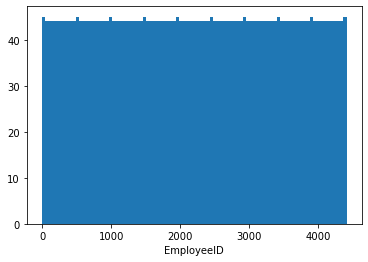

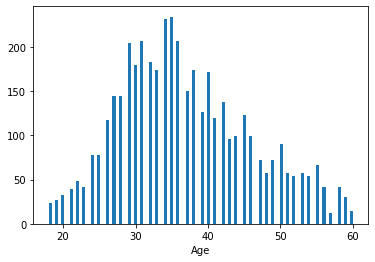

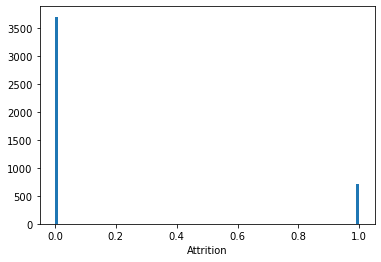

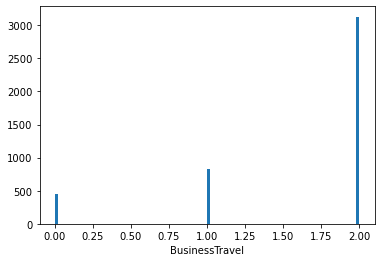

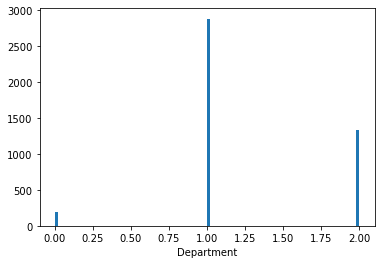

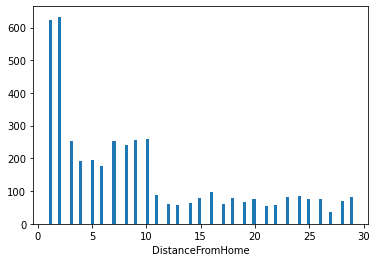

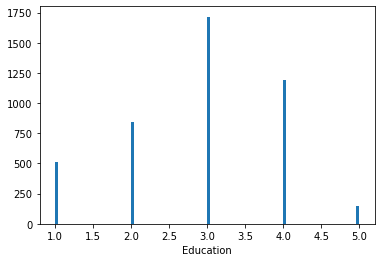

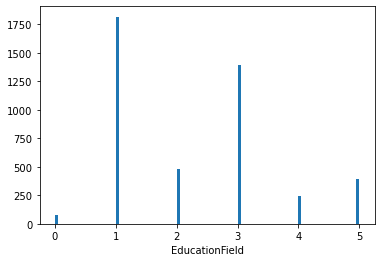

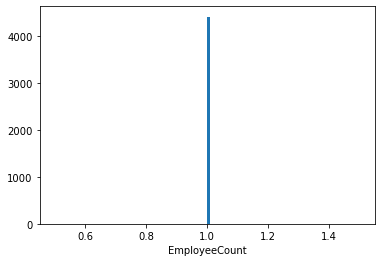

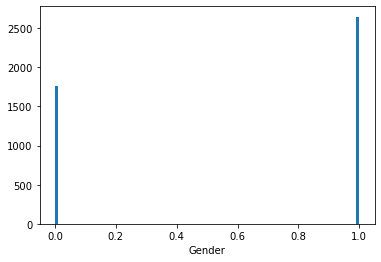

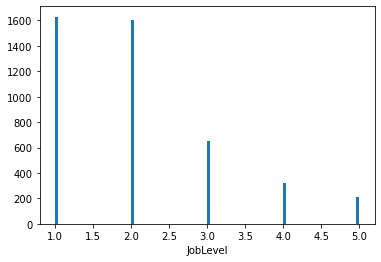

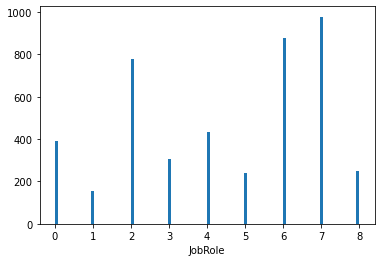

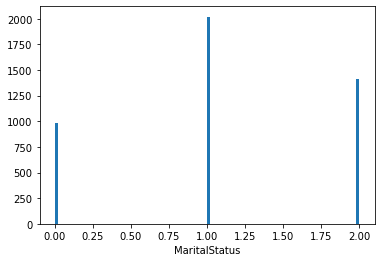

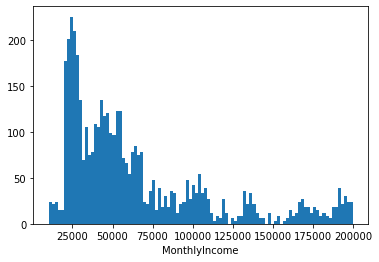

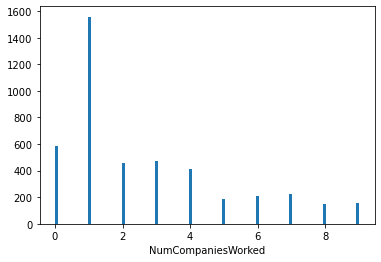

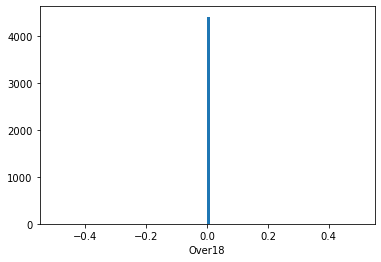

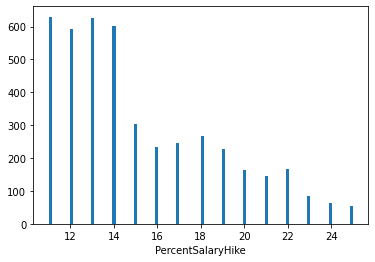

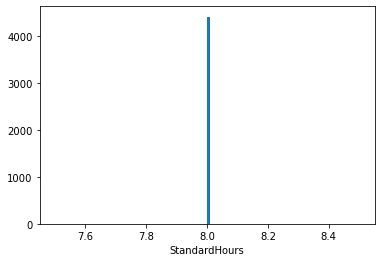

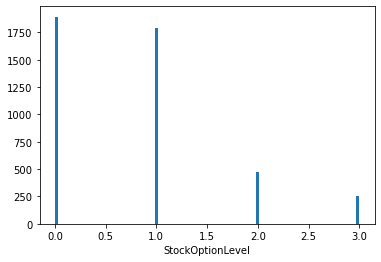

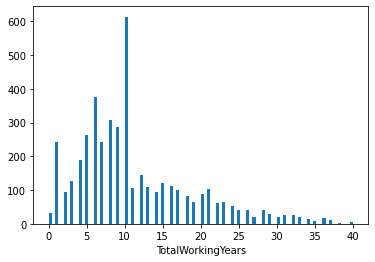

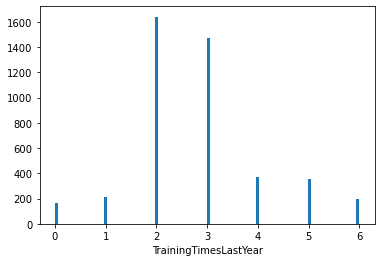

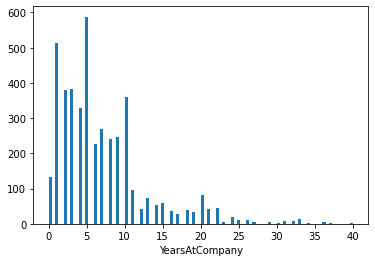

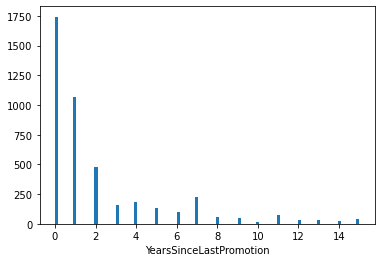

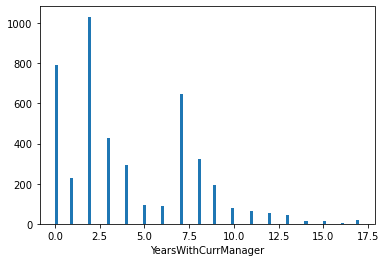

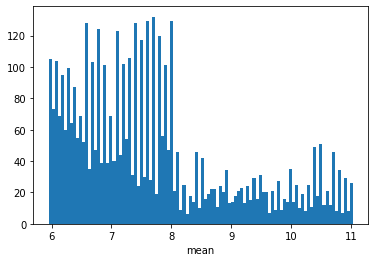

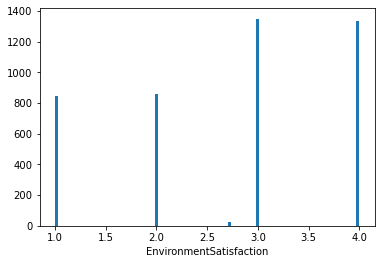

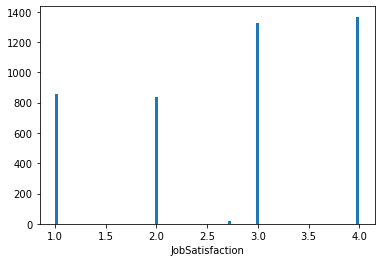

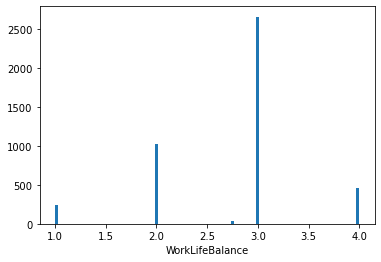

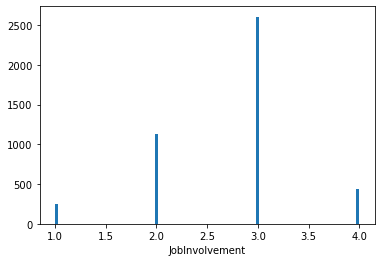

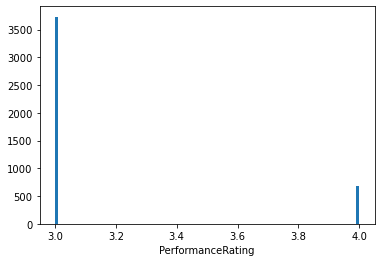

In [18]:
for column in general.columns : 
    plt.hist(general[column].squeeze() , bins = 100)
    plt.xlabel(column)
    plt.show()

In [19]:
#Drop the useless columns Age and Gender because it's not ethic to use this data in our Model
general.drop(columns=["Age","Gender"], inplace = True)
general.dtypes

EmployeeID                   int64
Attrition                    int64
BusinessTravel               int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
EmployeeCount                int64
JobLevel                     int64
JobRole                      int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                       int64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
mean                       float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

/Users/gauthierclet/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


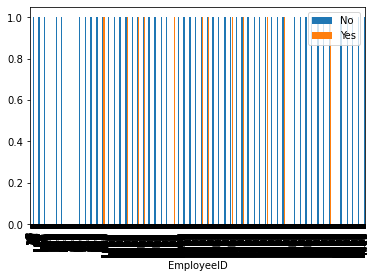

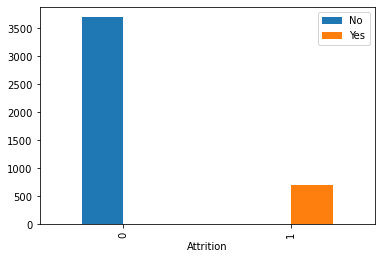

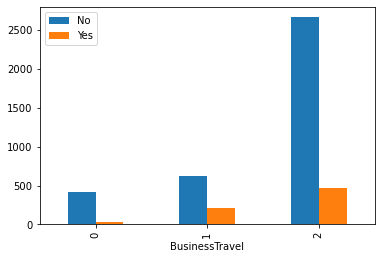

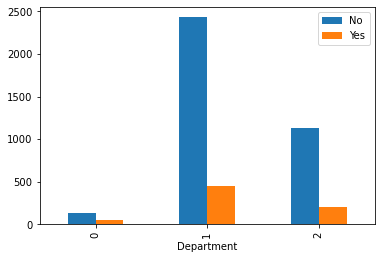

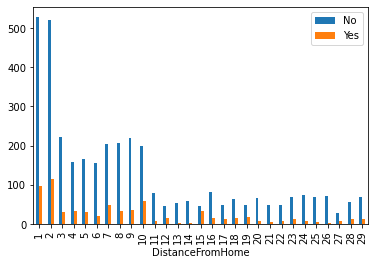

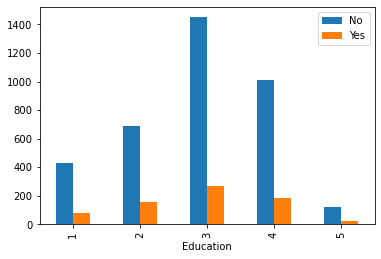

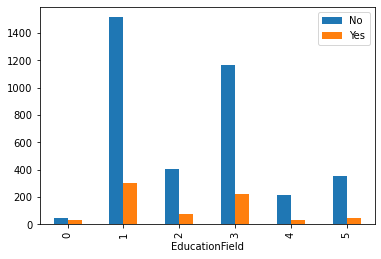

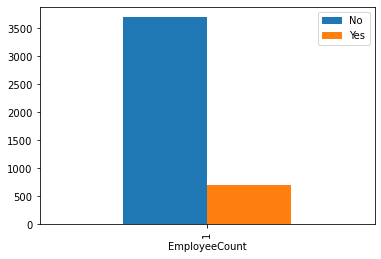

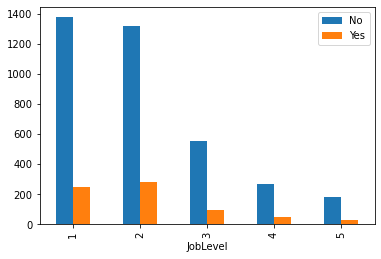

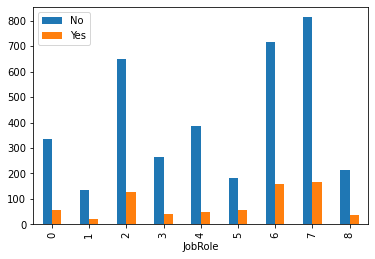

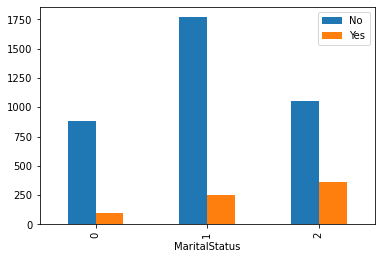

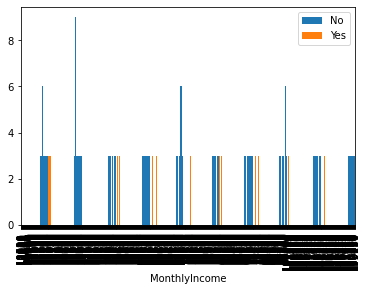

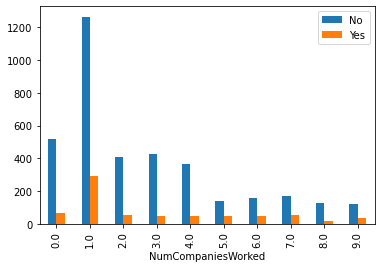

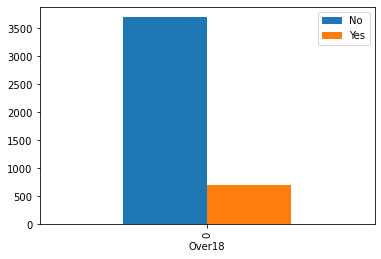

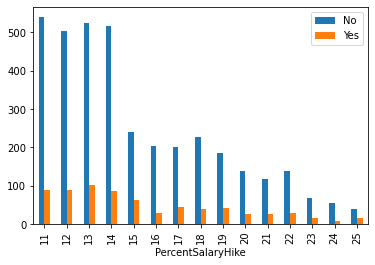

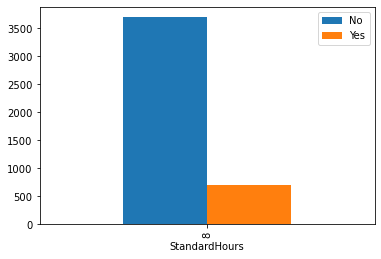

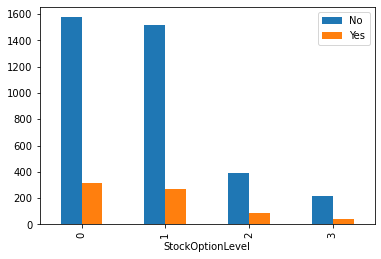

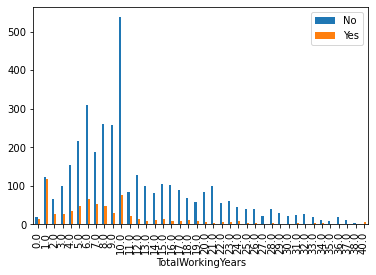

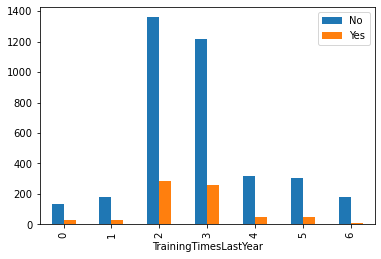

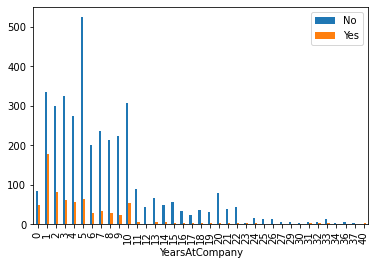

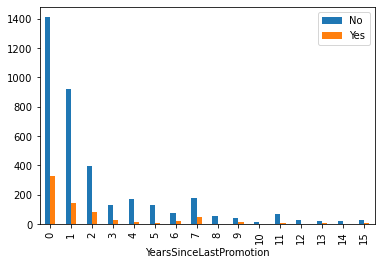

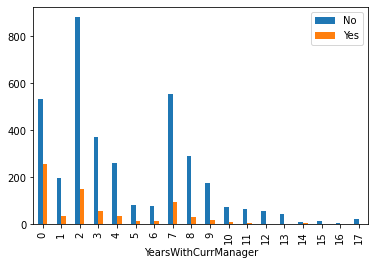

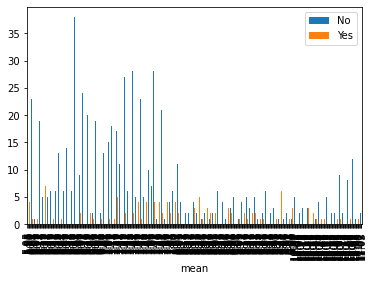

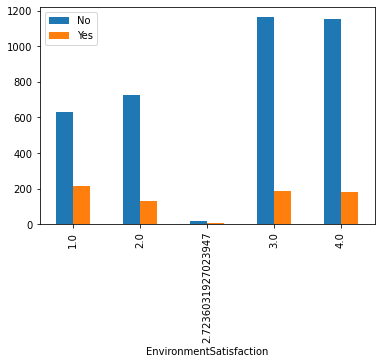

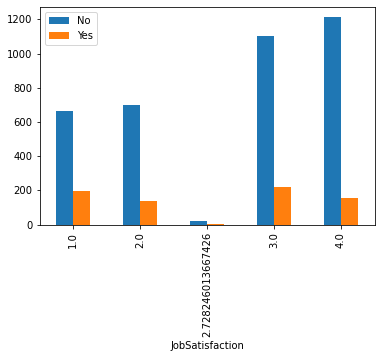

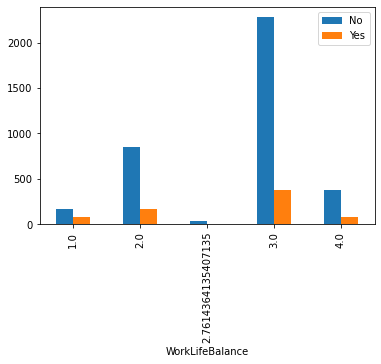

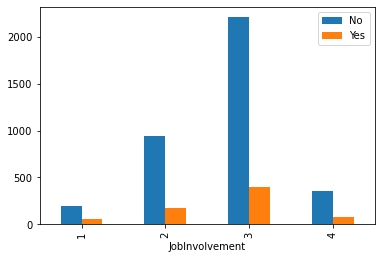

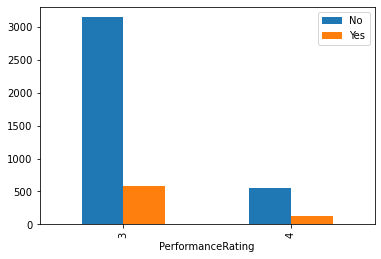

In [20]:
#We show the graphics with the correlation between the Attrition of every employees
for col in general.columns : 
    pd.crosstab(general[col], general.Attrition).plot(kind="bar")
    plt.xlabel(col)
    plt.legend(["No","Yes"])
    